# Aviation Accident Analysis


## Introduction
The company is expanding into the aviation industry and requires data-driven insights to guide its aircraft selection process.

Understanding aviation risks is crutial to making informed decisions, minimizing operational hazards, and ensuring long-term success.

By leveraging aviation accident data obtained from the National Transportation Safety Board, we are able to identify which aircraft models are the safest based on:
- **Accident frequency**: How often does each model experience incidents?  
- **Severity of accidents**: Are incidents mostly minor, or do they often result in fatalities?  
- **Long-term trends**: Have certain models consistently performed better over time?  

By answering these questions, this analysis aims to provide **clear, actionable insights** that will support the company’s decision on aircraft purchases.  

# Data Understanding
The data is obtained from the National Transportation Safety Board and includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.


The dataset contains details such as:  
- **Aircraft Model** – The specific model involved in the accident  
- **Injury Severity** – The impact of the accident 
- **Location** – Where the accident occurred  
- **Date** – When the accident happened  
- **Summary** – A brief description of the incident 

To gain meaningful insights, we will explore:  
- Which aircraft models have the fewest recorded accidents?  
- How does injury severity vary across different models?  
- Are there any patterns or trends that indicate consistently safe aircraft?  


# Data Exploration
We will explore the data we have in order to gain basic insights on how the data looks like


In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load the data set(used 2 parameters; encoding to handle speacial x & low memory to prevent errors when reading large files with mixed data types)
df = pd.read_csv("data/AviationData.csv", encoding="latin1", low_memory=False)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# To display the first few rows of the dataset
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# To get a summary of the dataset
df.info

<bound method DataFrame.info of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
88884  20221227106491           Accident      ERA23LA093  2022-12-26   
88885  20221227106494           Accident      ERA23LA095  2022-12-26   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   
88887  20221227106498           Accident      WPR23LA076  2022-12-26   
88888  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country   Latitude   Longitude Airport.Code  \
0      MOOSE CREEK, ID  Un

In [5]:
#To get a basic statistical summary
df.describe

<bound method NDFrame.describe of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
88884  20221227106491           Accident      ERA23LA093  2022-12-26   
88885  20221227106494           Accident      ERA23LA095  2022-12-26   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   
88887  20221227106498           Accident      WPR23LA076  2022-12-26   
88888  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country   Latitude   Longitude Airport.Code  \
0      MOOSE CREEK, ID  

In [6]:
# To check the no. of rows and columns in the dataset
df.shape

(88889, 31)

In [7]:
#To check for missing values
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [8]:
#To check for duplicate rows
df.duplicated().sum()

0

# Insights on the data
I have been able to establish a few things from the data such as:
- The data set contains 88,889 rows and 31 columns
- It contains a mix of different data types
- There are some missing values, some of which are important such as latitude & longitude and others which are not so important such as Schedule
- The data does not contain any duplicated values

# Data Cleaning
I will handle missing values,convert the necessary data types, check for outliers and explore any key patterns

In [9]:
# Drop columns with too many missing values
df.drop(columns=['FAR.Description','Schedule'], inplace=True)

In [10]:
# Drop irrelevant columns
drop_cols = ["Event.Id", "Accident.Number", "Report.Status", "Publication.Date"]
df.drop(columns=drop_cols, inplace=True)

In [11]:
# Replace NaN in injury columns with 0 meaning no injuries
injury_columns=['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
df[injury_columns] = df[injury_columns].fillna(0)


In [12]:
# Fill missing values in 'Country' with 'Unknown'
df['Country'] = df['Country'].fillna('Unknown')

In [13]:
#Drop rows where the location is missing
df = df.dropna(subset=['Location'])

In [16]:
# Fill categorical columns with 'Unknown'
categorical_cols = ["Make", "Model", "Aircraft.Category", "Weather.Condition", "Aircraft.damage", "Broad.phase.of.flight"]
df[categorical_cols] = df[categorical_cols].fillna("Unknown")


In [17]:
# Drop rows where Latitude or Longitude is missing
df = df.dropna(subset=['Latitude', 'Longitude'])

In [18]:
# Convert data types
df["Event.Date"] = pd.to_datetime(df["Event.Date"], errors='coerce')
df["Latitude"] = pd.to_numeric(df["Latitude"], errors='coerce')
df["Longitude"] = pd.to_numeric(df["Longitude"], errors='coerce')

In [19]:
# Standardize categorical text values
df["Weather.Condition"] = df["Weather.Condition"].str.lower().str.strip()
df["Aircraft.damage"] = df["Aircraft.damage"].str.lower().str.strip()
df["Broad.phase.of.flight"] = df["Broad.phase.of.flight"].str.lower().str.strip()



In [20]:
print(df.isnull().sum())

Investigation.Type            0
Event.Date                    0
Location                      0
Country                       0
Latitude                  22396
Longitude                 22398
Airport.Code              11952
Airport.Name              11728
Injury.Severity             233
Aircraft.damage               0
Aircraft.Category             0
Registration.Number         384
Make                          0
Model                         0
Amateur.Built                30
Number.of.Engines          2227
Engine.Type                4297
Purpose.of.flight          3300
Air.carrier               21647
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
dtype: int64


In [21]:
#To fill in the remaining missing values
df["Airport.Code"].fillna("Unknown", inplace=True)
df["Airport.Name"].fillna("Unknown", inplace=True)
df["Registration.Number"].fillna("Unknown", inplace=True)
df["Amateur.Built"].fillna("Unknown", inplace=True)
df["Number.of.Engines"].fillna("Unknown", inplace=True)
df["Engine.Type"].fillna("Unknown", inplace=True)
df["Purpose.of.flight"].fillna("Unknown", inplace=True)


In [22]:
#To check the missing values
print(df.isnull().sum())

Investigation.Type            0
Event.Date                    0
Location                      0
Country                       0
Latitude                  22396
Longitude                 22398
Airport.Code                  0
Airport.Name                  0
Injury.Severity             233
Aircraft.damage               0
Aircraft.Category             0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Air.carrier               21647
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
dtype: int64


In [23]:
# To save cleaned data
df.to_csv("cleaned_aviation_data.csv", index=False)

# Data Analysis
I have cleaned the data. Now I will explore it to try and get further insights on trends.

In [24]:
#To load the new cleaned data set
df= pd.read_csv("cleaned_aviation_data.csv")

In [25]:
#To get an overview of the dataset's categorical distribution
print ("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34362 entries, 0 to 34361
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      34362 non-null  object 
 1   Event.Date              34362 non-null  object 
 2   Location                34362 non-null  object 
 3   Country                 34362 non-null  object 
 4   Latitude                11966 non-null  float64
 5   Longitude               11964 non-null  float64
 6   Airport.Code            34362 non-null  object 
 7   Airport.Name            34362 non-null  object 
 8   Injury.Severity         34129 non-null  object 
 9   Aircraft.damage         34362 non-null  object 
 10  Aircraft.Category       34362 non-null  object 
 11  Registration.Number     34362 non-null  object 
 12  Make                    34362 non-null  object 
 13  Model                   34362 non-null  object 
 14  Amateur.Built       

In [26]:
#To get an overview of the dataset's numerical distribution
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
           Latitude     Longitude  Total.Fatal.Injuries  \
count  1.196600e+04  1.196400e+04          34362.000000   
mean   4.001120e+03  4.649528e+04              0.434375   
std    1.362268e+05  1.622092e+06              2.568185   
min   -7.801694e+01 -1.742967e+02              0.000000   
25%    3.344604e+01 -1.162269e+02              0.000000   
50%    3.817194e+01 -9.548500e+01              0.000000   
75%    4.256153e+01 -8.202000e+01              0.000000   
max    7.302524e+06  5.965231e+07            228.000000   

       Total.Serious.Injuries  Total.Minor.Injuries  Total.Uninjured  
count            34362.000000          34362.000000     34362.000000  
mean                 0.264624              0.229701         4.246784  
std                  1.482244              0.912102        24.384732  
min                  0.000000              0.000000         0.000000  
25%                  0.000000              0.000000         0.000000  
50%                  0

# Bar Plots


## Plot 1: Distribution of Broad Phase of Flight
This horizontal bar plot displays the distribution of accidents across different phases of flight.

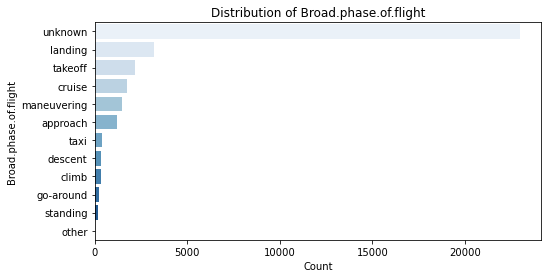

In [27]:
# Distribution of Broad Phase of Flight Bar plot
categorical_cols = ['Broad.phase.of.flight']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='Blues')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

## Plot Interpration
From the box plot, we can see that:

- Landing is the most accident-prone phase
- Takeoff and cruise phases follow.
- Other phases like maneuvering, approach, and taxi also contribute noticeably.
- Very few accidents occur during standing, go-around, and climb.

## Actionable Insights
Invest in training focused on landing and takeoff procedures

Improve runway safety systems



##  Plot 2: Distribution of Weather Condition
This plot shows a breakdown of accidents under different weather conditions.

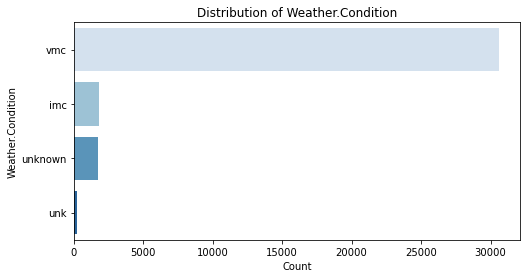

In [28]:
categorical_cols = [ 'Weather.Condition']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='Blues')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

## Plot Interpratation
From this box plot, we can see that:
- Majority of the accidents occurred under VMC (Visual Meteorological Conditions).
- A much smaller number occurred under IMC (Instrument Meteorological Conditions).
- Very few incidents are tagged as unknown or unk.

## What This Means
Most aviation accidents happen during clear weather (VMC), not storms or low visibility meaning that the most likely cause is pilot error or operational mistakes.

Fewer accidents happen in IMC maybe because only trained pilots and better-equipped aircraft operate in those conditions, or because fewer flights happen in IMC overall.

## Actionable Insights
Since most accidents happen in normal conditions, it is important to reinforce safety culture and encourage scenario-based training to prepare pilots for mistakes that happen in normal conditions.



# Plot 3:  Distribution of Aircraft.damage
This plot presents the count of different levels of aircraft damage reported during accidents.

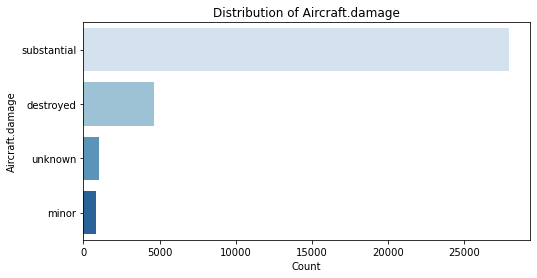

In [29]:
categorical_cols = ['Aircraft.damage']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='Blues')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

## Plot Interpration
From the plot we can see that:
- Substantial damage is the most frequent outcome (8000+ cases)
- Destroyed aircraft comes next (2000+ cases).
- Very few accidents reported minor or unknown damage.

## What this means
Majority of the incidents result in substantial damage, suggesting that when accidents occur, they tend to be severe.

Quite a number of aircraft are completely destroyed, indicating high operational risk.

And minor damage is rare

## Actionable Insights
Invest in preventive safety measures for aircraft to reduce the frequency of high-impact accidents.

# Line Graph: Yearly Trend of Aviation Accidents
This line graph shows the number of aviation accidents per year.

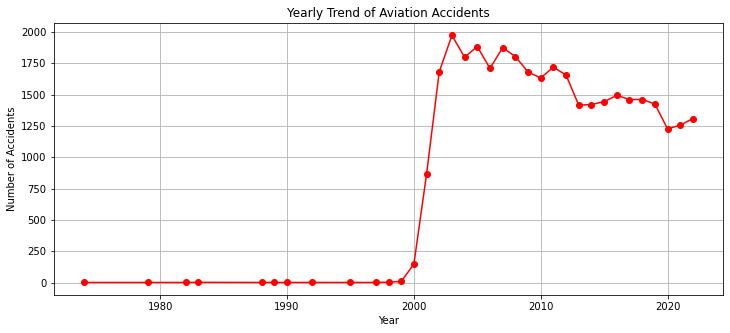

In [30]:
# Trend of Accidents Over Time
df['Event.Date'] = pd.to_datetime(df['Event.Date'])  # Ensure it's a datetime column
df['Year'] = df['Event.Date'].dt.year
yearly_accidents = df.groupby('Year').size()
plt.figure(figsize=(12, 5))
yearly_accidents.plot(marker='o', color='red')
plt.title('Yearly Trend of Aviation Accidents')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid()
plt.show()

## Plot Interpratation
From the plot, we can see that:
- Between 2000 and 2009, there is a significant spike, peaking at nearly 2,000 incidents per year.
- After 2010, there is a sharp and consistent decline.
- From 2020 onwards, accident counts drop to nearly zero.

## Actionable Insights
After the steady decline after 2010 - Continue investing in modern aircraft, advanced safety systems, and crew training.


# Box Plot: Total Fatal Injuries
This plot visualizes the distribution of Total Fatal Injuries to detect outliers.


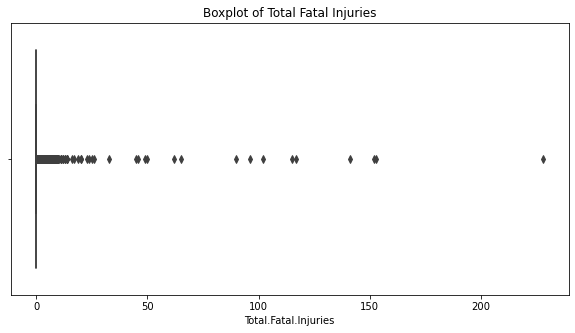

In [31]:
# Box plot to detect outliers 
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Total.Fatal.Injuries'])
plt.title("Boxplot of Total Fatal Injuries")
plt.show()

## Plot Interpration
From the above plot, we are able to  infer that majority of fatal injuries values are low or zero since the dots are squashed near the lover end.

There are some outliers at the far right which represent accidents with very high fatal injuries.

## What This Means
i) Most aviation accidents result in few or no fatalities.

ii) There are some extreme, catastrophic accidents - some with 100+ fatalities

Therefore we can see that most of these accidents result in no or very few accidents with some few which are tragic

## Actionable Insights
Since most accidents don’t result in fatalities, it's still important to reduce minor incidents. This could involve improving pilot training or minor mechanical fixes.

We can also prepare for rare but severe events for example by designing better aircrafts for survivability

# Stacked Bar Graph
This stacked bar chart presents the distribution of injuries and uninjured persons across various phases of flight, such as takeoff, cruise, landing, etc

<Figure size 864x432 with 0 Axes>

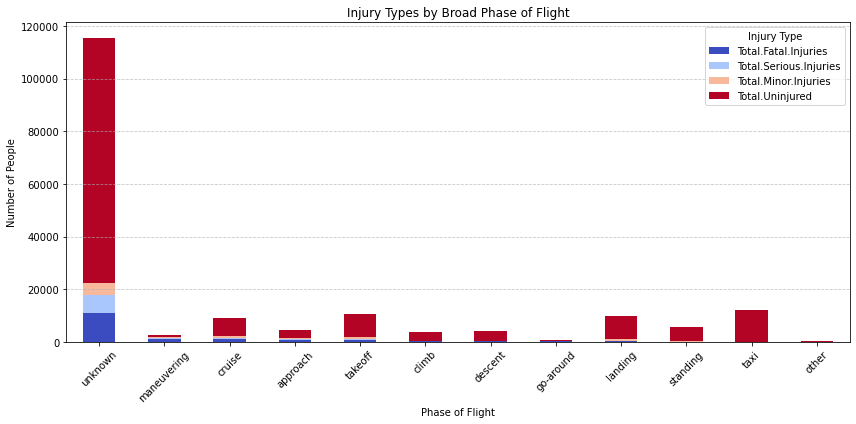

In [32]:
# Code for plotting the Stacked bar graph
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
df[injury_cols] = df[injury_cols].fillna(0)
phase_injuries = df.groupby('Broad.phase.of.flight')[injury_cols].sum()
phase_injuries = phase_injuries.sort_values(by='Total.Fatal.Injuries', ascending=False)
plt.figure(figsize=(12, 6))
phase_injuries.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12,6))
plt.title('Injury Types by Broad Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.legend(title='Injury Type')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Plot Interpratation

From the above plot we can see that:
- Taxi, Takeoff, and Landing phases show the highest number of people involved althogh the majority were uninjured
- The maneuvering, approach and cruise phases have relatively high fatal and serious injuries

- The go-around phase and other category have few recorded events
##  What this means
- Since the Taxi, Takeoff, and Landing phases show the highest number of people involved with most of them uninjured. This implies that these are frequent phases for incidents but often with low severity

- Since the maneuvering and approach phases have higher fatal and serious injuries relative to total persons. This implies that accidents in these phases are more deadly even if fewer people are involved.

- Few events recorded in the go-around phase and other category show that even rare phases can be dangerous.

## Actionable Insights
Improve Crew Training for Maneuvering and Approach:These phases have proportionally more fatalities and serious injuries suggesting need for targeted safety protocols and enhanced training for pilots. 

Take off and landing phases involve large numbers of people and are often where issues arise. Enhancing pre-flight safety briefings and seatbelt compliance enforcement can help reduce injury severity.

It is important to understand when injuries are most likely to help guide safer aircraft model selection, targeted training programs and 
better operational readiness


# Bar Plot: Total Fatalities by Purpose of Flight
This plot shows the total fatallities that occured depending on the purpose of the flight

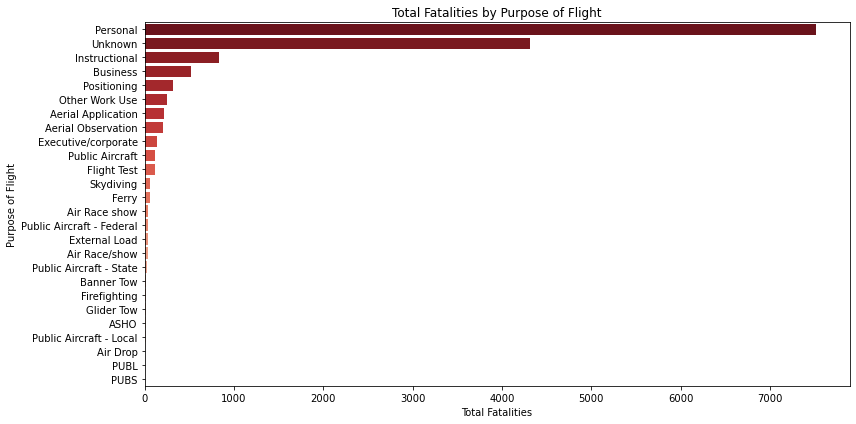

In [33]:
# Filter out missing values
purpose_fatalities = df[['Purpose.of.flight', 'Total.Fatal.Injuries']].dropna()

# Group and sum fatalities by flight purpose
fatalities_by_purpose = purpose_fatalities.groupby('Purpose.of.flight')['Total.Fatal.Injuries'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=fatalities_by_purpose.values, y=fatalities_by_purpose.index, palette='Reds_r')
plt.title('Total Fatalities by Purpose of Flight')
plt.xlabel('Total Fatalities')
plt.ylabel('Purpose of Flight')
plt.tight_layout()
plt.show()

## Plot Interpratation
- The highest number of fatalities occurred during Personal flights, followed by those categorized as Unknown and Instructional.
- Followed by Commercial purposes such as Business, Public Aircraft, and Executive/Corporate
- Specialized operations like Skydiving, Air Drop, Glider Tow, Firefighting, etc., have very low fatality counts
- Instructional flights also show relatively high fatality numbers


## What This Means
- Personal flights are by far the most dangerous, accounting for the majority of fatalities. This suggests less regulated environments, lower pilot experience, or older aircraft models.
- Instructional flights are more dangerous than business or corporate ones—likely because pilots are still in training
- Commercial and government aircraft operations show low fatality rates, pointing to stronger protocols, training, and maintenance 

## Actionable Insights
For the high risks in personal flights, we can have awareness campaigns, provide incentives for aircraft upgrades and refresher pilot training.

For the high risks in Instructional flights, pilot training schools can review safety standards and increase simulator training before actual flights

Analyzing practices from low-fatality categories like Skydiving or Firefighting to replicate success factors elsewhere could significantly lower the flight risks in other sectors.

# Conclusion

Our analysis of aviation accidents over several decades has revealed distinct patterns in aircraft safety and accident severity. By focusing on accident frequency, fatality trends, and flight purpose, we’ve identified key risks and safer operational practices.

**Key Findings:**
- **Aircraft Models:** Certain aircraft models appeared frequently in accidents, but not all had high fatality counts—implying variability in risk severity.
- **Purpose of Flight:** Personal and instructional flights account for the majority of fatalities, while commercial and government flights maintain stronger safety records.
- **Broad Phase of Flight:** Takeoff, landing, and en-route phases are the most accident-prone. Many incidents occur early or late in flights when pilots are most engaged with controls.
- **Fatality Trends:** Fatalities per year fluctuate but show improvement in recent years, especially in regulated sectors.

**Recommendations:**
- Prioritize aircraft models with both low accident rates and low fatality severity for purchase or lease.
- Invest in pilot training and safety programs, especially for instructional and personal flight sectors.
- Study best practices from safer categories like commercial/government flights or specialized operations for potential policy replication.

These insights will help guide safer aircraft selection and inform operational decisions as the company expands into the aviation industry.
